# Learning Platform

This is the pilot of analysis. Must gather some questions. Theme maybe?

```Learn from Huge City Learner```

Steps:

1. Summarize the data
2. Learn from Huge Learner


In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
BASE_PATH = '../data/'
PATH_DATA = BASE_PATH+'engagement_data/'

### Content 

* [Summarize The Data](#first-bullet)
* [xxx](#second-bullet)

Notes :
A student from a household with an income at or below 130 percent of the poverty income threshold is eligible for free lunch. A student from a household with an income between 130 percent and up to 185 percent of the poverty threshold is eligible for reduced price lunch. [source](https://nces.ed.gov/blogs/nces/post/free-or-reduced-price-lunch-a-proxy-for-poverty#:~:text=A%20student%20from%20a%20household,eligible%20for%20reduced%20price%20lunch.)

## Summarize The Data <a class="anchor" id="first-bullet"></a>

In [4]:
# df_eng = pd.DataFrame()
# for f in [i for i in os.listdir(PATH_DATA) if '.csv' in i]:
#     df_temp = pd.read_csv(PATH_DATA+f)
#     df_temp['district_id'] = f[:-4]
#     df_eng = df_eng.append(df_temp)
    
# df_eng = df_eng.reset_index()
# del df_eng['index']
# df_eng.to_csv(BASE_PATH+'eng_merge.csv',index = False)

df_eng = pd.read_csv(BASE_PATH+'eng_merge.csv')
df_distr = pd.read_csv(BASE_PATH+'districts_info.csv')
df_product = pd.read_csv(BASE_PATH+'products_info.csv')

In [5]:
## Functions

def matrix_normalize(d0, axis = 1):
    if axis:
        d1 = ((d0.transpose()/d0.sum(axis = 1)).transpose())
    else:
        d1 = (d0/d0.sum())
    return d1

# def matrix_viz():

In [6]:
df_eng.shape

(22324190, 5)

In [7]:
df_eng.head()

,time,lp_id,pct_access,engagement_index,district_id
0,2020-01-01,93690.0,0.00,NaN,1000
1,2020-01-01,17941.0,0.03,0.90,1000
2,2020-01-01,65358.0,0.03,1.20,1000
3,2020-01-01,98265.0,0.57,37.79,1000
4,2020-01-01,59257.0,0.00,NaN,1000


In [8]:
df_distr.head()

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000["
1,2685,NaN,NaN,NaN,NaN,NaN,NaN
2,4921,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[6000, 8000["
3,3188,NaN,NaN,NaN,NaN,NaN,NaN
4,2238,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df_product.head()

,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",PreK-12,LC - Digital Learning Platforms
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",PreK-12,"LC - Sites, Resources & Reference - Games & Si..."
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,PreK-12; Higher Ed,LC - Digital Learning Platforms
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,PreK-12,LC - Digital Learning Platforms


### Districts, Products and Engagements

seperate summary of each table.

In [10]:
df_distr.isnull().sum()

district_id                   0
state                        57
locale                       57
pct_black/hispanic           57
pct_free/reduced             85
county_connections_ratio     71
pp_total_raw                115
dtype: int64

In [11]:
df_product.isnull().sum()

LP ID                          0
URL                            0
Product Name                   0
Provider/Company Name          1
Sector(s)                     20
Primary Essential Function    20
dtype: int64

In [12]:
df_eng.isnull().sum()

time                      0
lp_id                   541
pct_access            13447
engagement_index    5378409
district_id               0
dtype: int64

In [13]:
df_eng[df_eng['engagement_index'].isnull()].pct_access.unique()

array([ 0., nan])

In [14]:
## Preparation
df_eng['time'] = pd.to_datetime(df_eng['time'])
df_eng['day'] = df_eng['time'].dt.strftime('%Y-%m-%d')
df_eng['weeks'] = df_eng['time'].dt.strftime('%W')
df_eng['weekday'] = df_eng['time'].dt.strftime('%w')
df_eng['is_weekend'] = df_eng['weekday'].isin(['0','6'])

df_distr['locale'] = df_distr['locale'].fillna('unknown')
df_eng['lp_id'] = df_eng['lp_id'].fillna(-1)

df_eng['lp_id'] = df_eng['lp_id'].astype(int).astype(str)
df_product['LP ID'] = df_product['LP ID'].astype(int).astype(str)
df_product['Primary Essential Function'] = df_product[
                'Primary Essential Function'].fillna(' - ')

df_product['product_functions'] = df_product['Primary Essential Function'].apply(
    lambda x : x.split('-')[0].strip())

df_product['product_essential'] = df_product['Primary Essential Function'].apply(
    lambda x : x.split('-')[1].strip())

df_product['product_essential'] = df_product['product_essential'].replace(
            {'Sites, Resources & References':
                         'Sites, Resources & Reference'})

#### Districts

In [16]:
len(df_eng.district_id.unique()) ## --> 233 district

233

In [17]:
df_distr.shape

(233, 7)

In [18]:
df_distr.groupby('locale')['district_id'].size().sort_values(ascending=False)

locale
Suburb     104
unknown     57
Rural       33
City        29
Town        10
Name: district_id, dtype: int64

In [19]:
df_distr.groupby('county_connections_ratio').size() ## not really informatif

county_connections_ratio
[0.18, 1[    161
[1, 2[         1
dtype: int64

In [20]:
df_distr.groupby('pct_black/hispanic').size()

pct_black/hispanic
[0, 0.2[      116
[0.2, 0.4[     24
[0.4, 0.6[     17
[0.6, 0.8[     11
[0.8, 1[        8
dtype: int64

In [21]:
df_distr.groupby('pct_free/reduced').size()

pct_free/reduced
[0, 0.2[      46
[0.2, 0.4[    48
[0.4, 0.6[    37
[0.6, 0.8[    13
[0.8, 1[       4
dtype: int64

In [22]:
df_distr.groupby('pp_total_raw').size()

pp_total_raw
[10000, 12000[    17
[12000, 14000[    15
[14000, 16000[    15
[16000, 18000[    13
[18000, 20000[     8
[20000, 22000[     2
[22000, 24000[     2
[32000, 34000[     1
[4000, 6000[       2
[6000, 8000[      13
[8000, 10000[     30
dtype: int64

In [23]:
fr_hb_matrix = df_distr.groupby(['pct_black/hispanic',
            'pct_free/reduced']).size().unstack().fillna(0)

<AxesSubplot:xlabel='pct_free/reduced', ylabel='pct_black/hispanic'>

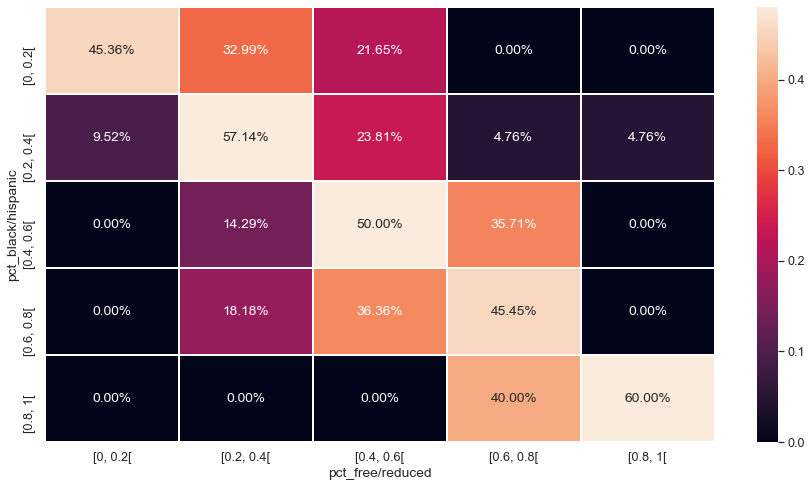

In [24]:
plt.figure(figsize = (15,8))
sns.set(font_scale=1.15)
sns.heatmap(matrix_normalize(fr_hb_matrix)
                ,annot= True, fmt = '.2%', linewidths=0.5
                ,vmax = 0.48)

In [25]:
## F test to see the correlation

In [26]:
df_distr['state'].value_counts()[:15]

Connecticut             30
Utah                    29
Massachusetts           21
Illinois                18
California              12
Ohio                    11
New York                 8
Indiana                  7
Missouri                 6
Washington               6
North Carolina           4
Virginia                 4
Wisconsin                3
District Of Columbia     3
Tennessee                2
Name: state, dtype: int64

#### Products

In [27]:
len(df_eng.lp_id.unique()) ## --> 8647 products

8647

In [28]:
df_product.shape ## but we only have 372 data products details (top 372)

(372, 8)

In [29]:
len(set(df_eng.lp_id.unique()) - set(df_product['LP ID']))

8278

In [30]:
df_eng['has_details'] = df_eng.lp_id.isin(df_product['LP ID']).astype(int)
df_eng2 = df_eng[df_eng.has_details == 0]

In [31]:
df_eng2.shape[0]/df_eng.shape[0]

0.4762816926392402

In [32]:
df_product['Sector(s)'].value_counts()

PreK-12                          170
PreK-12; Higher Ed; Corporate    115
PreK-12; Higher Ed                65
Higher Ed; Corporate               1
Corporate                          1
Name: Sector(s), dtype: int64

In [33]:
df_product['product_functions'].value_counts()

LC           272
CM            34
SDO           30
              20
LC/CM/SDO     16
Name: product_functions, dtype: int64

In [34]:
df_product['product_essential'].value_counts() ## --> one essential must have one function

Sites, Resources & Reference                              101
Digital Learning Platforms                                 74
Content Creation & Curation                                36
Study Tools                                                35
Classroom Engagement & Instruction                         20
                                                           20
Courseware & Textbooks                                     18
Other                                                      18
Data, Analytics & Reporting                                11
Virtual Classroom                                           7
Teacher Resources                                           7
Learning Management Systems (LMS)                           5
Online Course Providers & Technical Skills Development      5
School Management Software                                  4
Human Resources                                             4
Career Planning & Job Search                                3
Large   

In [35]:
df_product['Provider/Company Name'].value_counts()[:15]

Google LLC                                                 30
Microsoft                                                   6
Houghton Mifflin Harcourt                                   6
Learning A-Z                                                4
IXL Learning                                                4
 Autodesk, Inc                                              3
McGraw-Hill PreK-12                                         3
Adobe Inc.                                                  3
Curriculum Associates                                       3
Scholastic Inc                                              3
Savvas Learning Company | Formerly Pearson K12 Learning     3
PBS                                                         3
The College Board                                           3
ExploreLearning, LLC                                        3
Discovery Education                                         2
Name: Provider/Company Name, dtype: int64

In [36]:
# funtion_essential_matrix = df_product.groupby(['product_essential',
#             'product_functions']).size().unstack().fillna(0)

# plt.figure(figsize = (15,8))
# sns.set(font_scale=1.15)
# sns.heatmap(matrix_normalize(funtion_essential_matrix)
#                 ,annot= True, fmt = '.2%', linewidths=0.5
#                 ,vmax = 0.48)

#### Engagements

In [37]:
df_eng.time.min(), df_eng.time.max()

(Timestamp('2020-01-01 00:00:00'), Timestamp('2020-12-31 00:00:00'))

In [38]:
## Daily Pct Access regardless areas or product (Not Zero)

## Most of time (more than 98%) less than 5% have at least one page load.
## But there is one day on particular areas (and source) have 100% access.

df_eng[df_eng['pct_access']>0]['pct_access'].describe()

count    1.530976e+07
mean     7.348232e-01
std      3.817397e+00
min      1.000000e-02
25%      2.000000e-02
50%      5.000000e-02
75%      1.900000e-01
max      1.000000e+02
Name: pct_access, dtype: float64

In [39]:
df_eng['pct_access'].quantile(0.98)

4.85

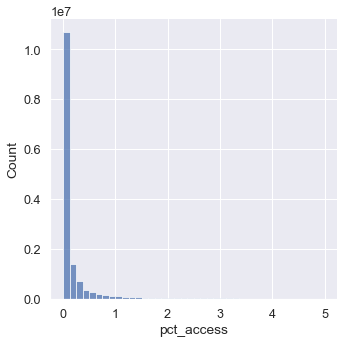

In [40]:
sns.displot(df_eng[(df_eng['pct_access']>0) & (df_eng['pct_access']<5)]['pct_access'], bins = 40)

In [41]:
# len((df_eng[(df_eng['pct_access']>0) & (df_eng['pct_access']<3)]))/len(df_eng[(df_eng['pct_access']>0)])

In [42]:
df_eng_less5 = df_eng[(df_eng['pct_access']>0) & (df_eng['pct_access']<3)]

In [43]:
## Daily engagement_index regardless areas or product (Not Zero pct_access)

## Most of time, the engagement index less than 450

df_eng_less5['engagement_index'].describe()

count    1.466653e+07
mean     2.922911e+01
std      1.265268e+02
min      5.000000e-02
25%      5.300000e-01
50%      2.340000e+00
75%      1.308000e+01
max      2.302012e+04
Name: engagement_index, dtype: float64

In [44]:
df_eng_less5['engagement_index'].quantile(0.98),df_eng['engagement_index'].quantile(0.98)

(287.19, 1154.33)

<AxesSubplot:xlabel='engagement_index', ylabel='Count'>

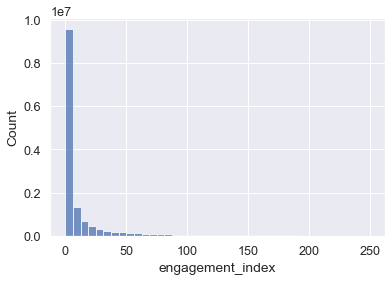

In [46]:
sns.histplot(df_eng_less5[(df_eng_less5['engagement_index']<250)]['engagement_index'], bins = 40)

In [50]:
day_size = df_eng.groupby('day').size()
day_unique_product = df_eng.groupby('day')['lp_id'].apply(pd.Series.nunique)
day_unique_areas = df_eng.groupby('day')['district_id'].apply(pd.Series.nunique)

<AxesSubplot:xlabel='day'>

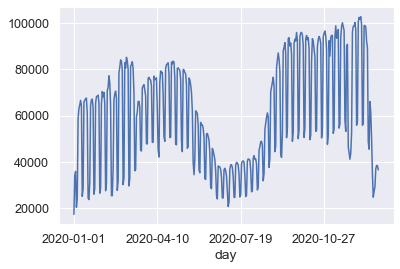

In [51]:
day_size.plot()

<AxesSubplot:xlabel='day'>

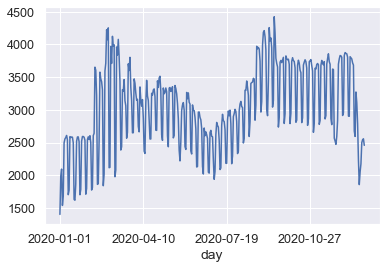

In [66]:
day_unique_product.plot()

<AxesSubplot:xlabel='day'>

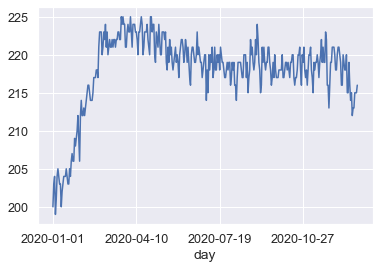

In [49]:
day_unique_areas.plot()

<AxesSubplot:xlabel='day'>

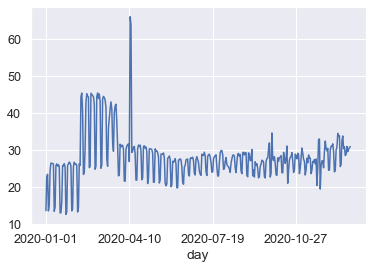

In [62]:
## Checking Trend
df_eng_less3.groupby('day')['engagement_index'].mean().plot()

In [ ]:
df_eng.sample(10)

In [ ]:
## is all districts daily actives?
areas_day_cnt = df_eng[df_eng.pct_access>0].groupby('distict_id')[
    'time'].apply(pd.Series.nunique)

areas_day_cnt.sort_values()[:15]